In [ ]:
# In the previous recipe we used a brute force approach based on Monte Carlo simulations to visualize the efficient frontier.
# In this recipe, we use a more refined method to find the frontier.
# In this recipe, we work with the same dataset as in the previous one in order to show that the results obtained by both approaches are similar.

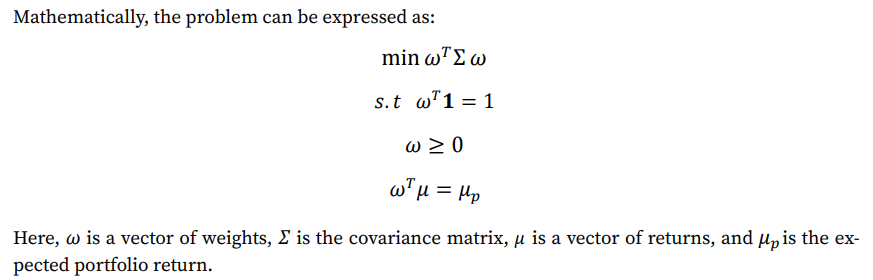

In [5]:
import numpy as np
import yfinance as yf
import pandas as pd
import scipy.optimize as sco

In [4]:
# Define functions for calculating portfolio returns and volatility:

def get_portf_rtn(w, avg_rtns):
 return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
 return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [ ]:
# Define the function calculating the efficient frontier:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):

 efficient_portfolios = []

 n_assets = len(avg_returns)
 args = (avg_returns, cov_mat)
 bounds = tuple((0,1) for asset in range(n_assets))
 initial_guess = n_assets * [1. / n_assets, ]

 for ret in rtns_range:
  constr = (
  {"type": "eq",
  "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},
  {"type": "eq",
  "fun": lambda x: np.sum(x) - 1}
  )
  ef_portf = sco.minimize(get_portf_vol,
  initial_guess,
  args=args, method="SLSQP",
  constraints=constr,
  bounds=bounds)
  efficient_portfolios.append(ef_portf)

 return efficient_portfolios

In [ ]:
# Define the considered range of expected portfolio returns:
rtns_range = np.linspace(-0.1, 0.55, 200)

In [ ]:
# Calculate the efficient frontier:
efficient_portfolios = get_efficient_frontier(avg_returns,
 cov_mat,
 rtns_range)

In [ ]:
# Extract the volatilities of the efficient portfolios:
vols_range = [x["fun"] for x in efficient_portfolios]

In [ ]:
# Plot the calculated efficient frontier, together with the simulated portfolios:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
 y="returns", c="sharpe_ratio",
 cmap="RdYlGn", edgecolors="black",
 ax=ax)
ax.plot(vols_range, rtns_range, "b--", linewidth=3)
ax.set(xlabel="Volatility",
 ylabel="Expected Returns",
 title="Efficient Frontier")
plt.show()

In [ ]:
# Identify the minimum volatility portfolio:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]
min_vol_portf = {
 "Return": min_vol_portf_rtn,
 "Volatility": min_vol_portf_vol,
 "Sharpe Ratio": (min_vol_portf_rtn / min_vol_portf_vol)
}

In [ ]:
# Print the performance summary:
print_portfolio_summary(min_vol_portf,
 efficient_portfolios[min_vol_ind]["x"],
 ASSETS,
 name="Minimum Volatility")